# Import all functions

In [1]:
import numpy as np
from Demand_Scenario_Functions import *
from Climate_Scenario_Functions import *
from Scenario_Tree_Functions import *

# Climate Scenarios

## Initialization

In [2]:
year = 2015
month = 9
start_day = 16 #The first day
end_day = 18 #The last day
sunlight_hour = 12.5
N = 5 # Number of scenarios

## Importing datasets

In [3]:
#Solar Irradiance datasets
url1='https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/rsds_day_CNRM-CM5_rcp85.csv'
url2='https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/rsds_day_CNRM-CM5_rcp45.csv'

url3='https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/rsds_day_MIROC5_rcp85.csv'
url4='https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/rsds_day_MIROC5_rcp45.csv'

solar_irrad_CNRM_85 = pd.read_csv(url1)
solar_irrad_CNRM_45 = pd.read_csv(url2)

solar_irrad_MIROC_85=pd.read_csv(url3)
solar_irrad_MIROC_45=pd.read_csv(url4)


#Average temperature datasets
url5= 'https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/tasavg_day_CNRM-CM5_rcp45.csv'
url6= 'https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/tasavg_day_CNRM-CM5_rcp85.csv'

url7= 'https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/tasavg_day_MIROC5_rcp45.csv'
url8= 'https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/tasavg_day_MIROC5_rcp85.csv'


t_avg_CNRM_85 = pd.read_csv(url6)
t_avg_CNRM_45 = pd.read_csv(url5)

t_avg_MIROC_85 = pd.read_csv(url8)
t_avg_MIROC_45 = pd.read_csv(url7)

In [4]:
url9 = 'https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/solarirrad_hour_cnrm_rcp45_lompoc.csv'
solar_irrad_hourly = pd.read_csv(url9)


solar_irrad_hourly_coeff = solar_irrad_hourly_coeff(month, solar_irrad_hourly)

## Preprocessing

In [5]:
solar_irrad_CNRM_85=solarirrad_preprocessing(solar_irrad_CNRM_85,month)
solar_irrad_CNRM_45 = solarirrad_preprocessing(solar_irrad_CNRM_45, month)

solar_irrad_MIROC_85 = solarirrad_preprocessing(solar_irrad_MIROC_85, month)
solar_irrad_MIROC_45 = solarirrad_preprocessing(solar_irrad_MIROC_45, month)

In [6]:
t_avg_CNRM_85 = t_avg_preprocessing(t_avg_CNRM_85, year, month)
t_avg_CNRM_45 = t_avg_preprocessing(t_avg_CNRM_45, year, month)

t_avg_MIROC_85 = t_avg_preprocessing(t_avg_MIROC_85, year, month)
t_avg_MIROC_45 = t_avg_preprocessing(t_avg_MIROC_45, year, month)

## Generating Solar Irradiance Scenarios

In [7]:
CNRM_85_daily_irrad_scenario, CNRM_85_daily_irrad_prob_norm = generate_solarirrad_scenarios(solar_irrad_CNRM_85, N)
CNRM_45_daily_irrad_scenario, CNRM_45_daily_irrad_prob_norm = generate_solarirrad_scenarios(solar_irrad_CNRM_45,N)

MIROC_85_daily_irrad_scenario, MIROC_85_daily_irrad_prob_norm = generate_solarirrad_scenarios(solar_irrad_MIROC_85,N)
MIROC_45_daily_irrad_scenario, MIROC_45_daily_irrad_prob_norm = generate_solarirrad_scenarios(solar_irrad_MIROC_45, N)

## Converting Daily Average Solar Irradiance to Daily Sum Solar Irradiance

In [8]:
CNRM_85_daily_irrad_scenario_sum = solarirrad_daily_avg_to_daily_sum(CNRM_85_daily_irrad_scenario, sunlight_hour)
CNRM_45_daily_irrad_scenario_sum = solarirrad_daily_avg_to_daily_sum(CNRM_45_daily_irrad_scenario, sunlight_hour)

MIROC_85_daily_irrad_scenario_sum = solarirrad_daily_avg_to_daily_sum(MIROC_85_daily_irrad_scenario, sunlight_hour)
MIROC_45_daily_irrad_scenario_sum = solarirrad_daily_avg_to_daily_sum(MIROC_45_daily_irrad_scenario, sunlight_hour)

## Power output of a 100 [W] PV

In [9]:
daily_pv_generation_CNRM_85 = pv_generation(CNRM_85_daily_irrad_scenario_sum, t_avg_CNRM_85, N)
daily_pv_generation_CNRM_45 = pv_generation(CNRM_45_daily_irrad_scenario_sum, t_avg_CNRM_45, N)

daily_pv_generation_MIROC_85 = pv_generation(MIROC_85_daily_irrad_scenario_sum, t_avg_MIROC_85, N)
daily_pv_generation_MIROC_45 = pv_generation(MIROC_45_daily_irrad_scenario_sum, t_avg_MIROC_45, N)

## Converting Daily Power Output to Hourly Power Output

In [10]:
hourly_pv_generation_CNRM_85 = daily_to_hourly_pv_generation (daily_pv_generation_CNRM_85 , solar_irrad_hourly_coeff , N)
hourly_pv_generation_CNRM_45 = daily_to_hourly_pv_generation (daily_pv_generation_CNRM_45 , solar_irrad_hourly_coeff , N)

hourly_pv_generation_MIROC_85 = daily_to_hourly_pv_generation (daily_pv_generation_MIROC_85 , solar_irrad_hourly_coeff , N)
hourly_pv_generation_MIROC_45 = daily_to_hourly_pv_generation (daily_pv_generation_MIROC_45 , solar_irrad_hourly_coeff , N)

In [11]:
hourly_pv_generation_CNRM_85=pd.DataFrame(hourly_pv_generation_CNRM_85)
hourly_pv_generation_CNRM_45=pd.DataFrame(hourly_pv_generation_CNRM_45)

hourly_pv_generation_MIROC_85=pd.DataFrame(hourly_pv_generation_MIROC_85)
hourly_pv_generation_MIROC_45=pd.DataFrame(hourly_pv_generation_MIROC_45)

## Plotting the Results

### Plot climate scenarios

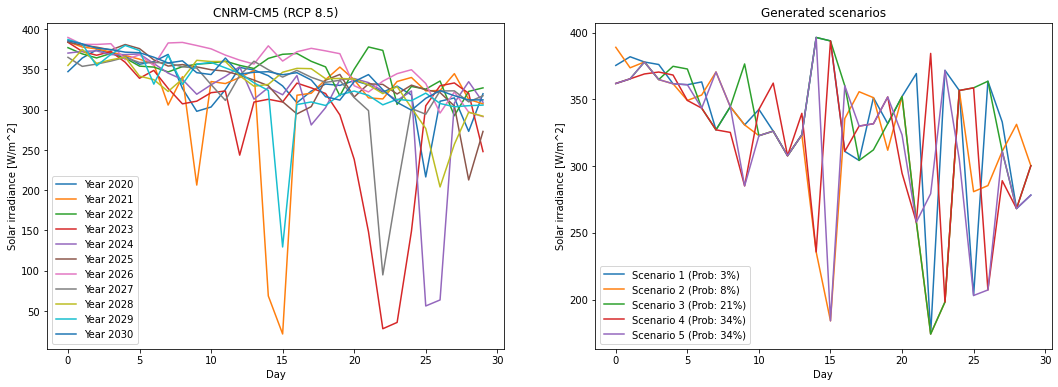

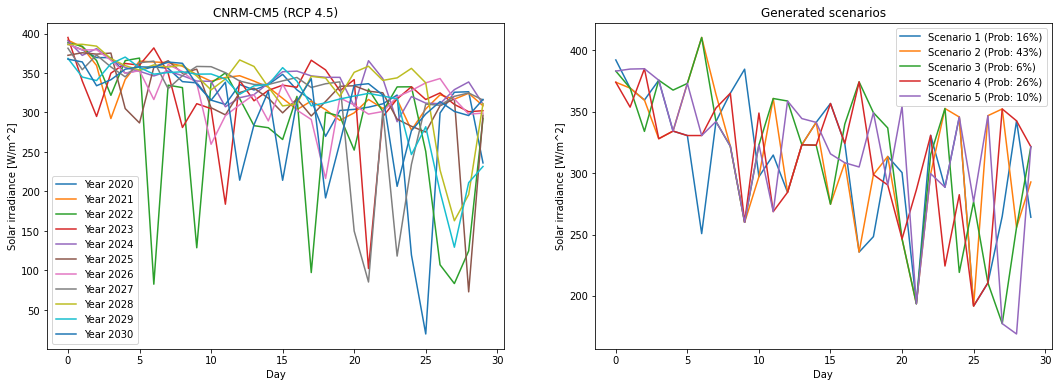

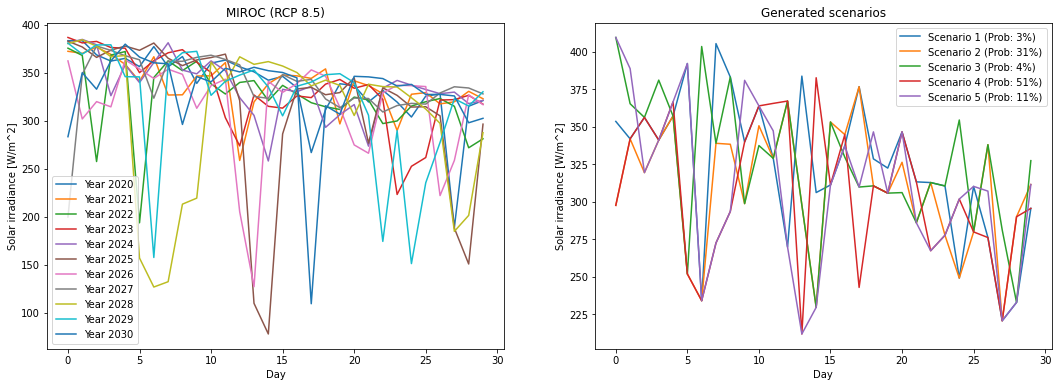

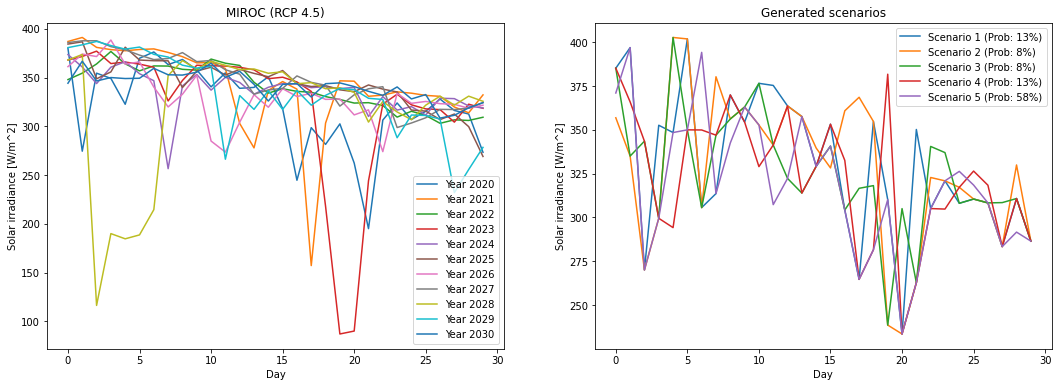

In [12]:
plot_data_and_climate_scenarios(solar_irrad_CNRM_85, CNRM_85_daily_irrad_scenario, CNRM_85_daily_irrad_prob_norm, name='CNRM-CM5 (RCP 8.5)')
plot_data_and_climate_scenarios(solar_irrad_CNRM_45 , CNRM_45_daily_irrad_scenario , CNRM_45_daily_irrad_prob_norm,name='CNRM-CM5 (RCP 4.5)' )

plot_data_and_climate_scenarios(solar_irrad_MIROC_85 , MIROC_85_daily_irrad_scenario , MIROC_85_daily_irrad_prob_norm,name='MIROC (RCP 8.5)')
plot_data_and_climate_scenarios(solar_irrad_MIROC_45, MIROC_45_daily_irrad_scenario, MIROC_45_daily_irrad_prob_norm, name='MIROC (RCP 4.5)')

### Plot PV Scenarios (CFPV)

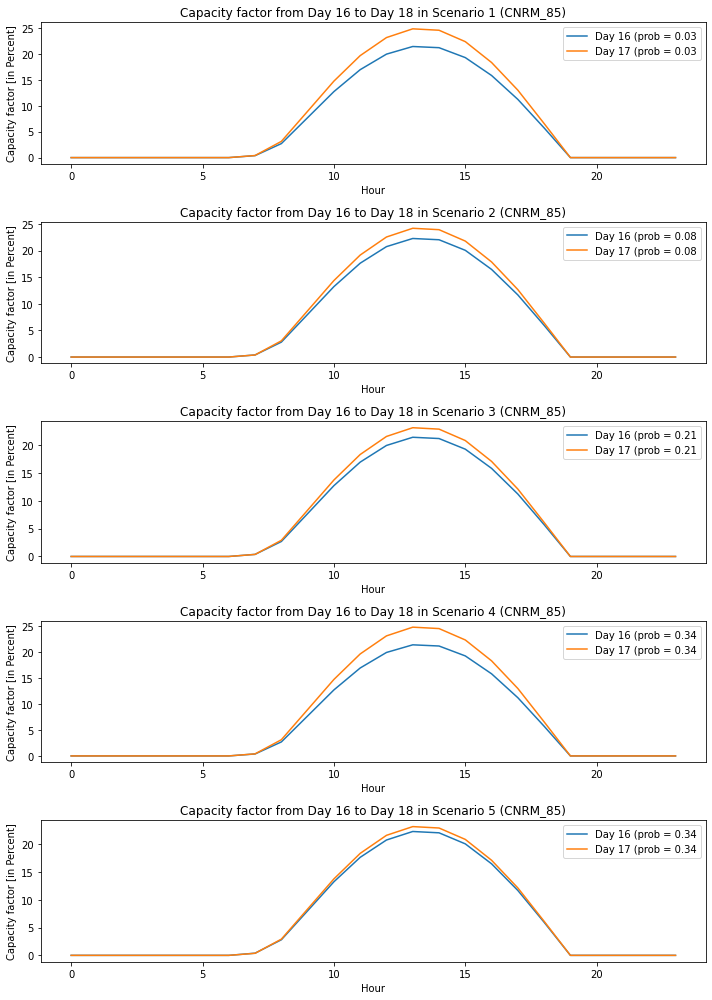

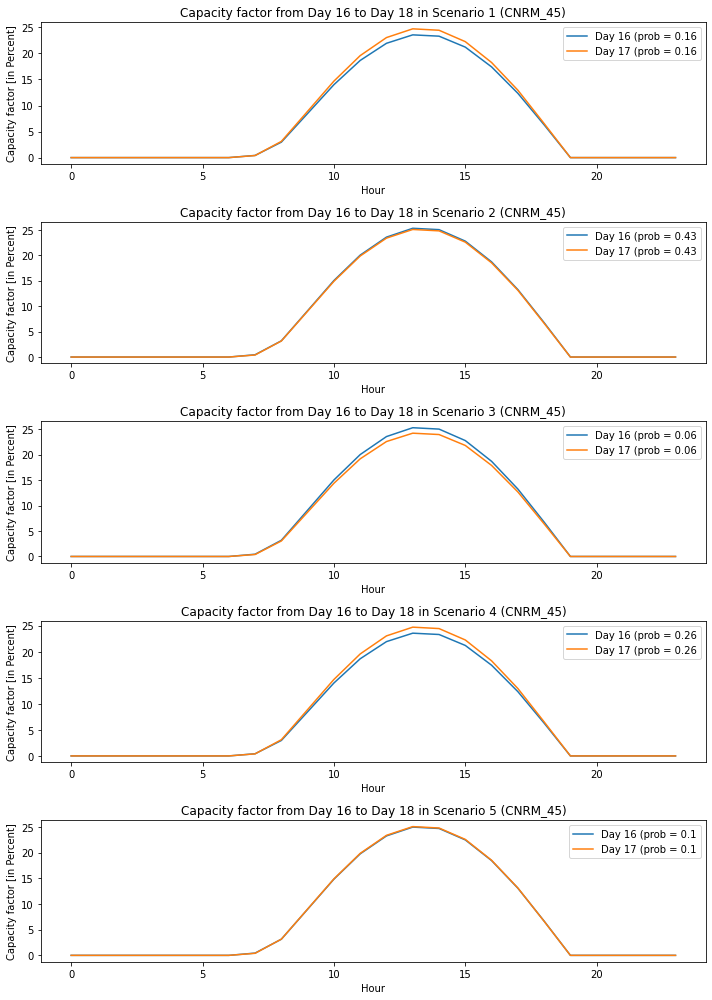

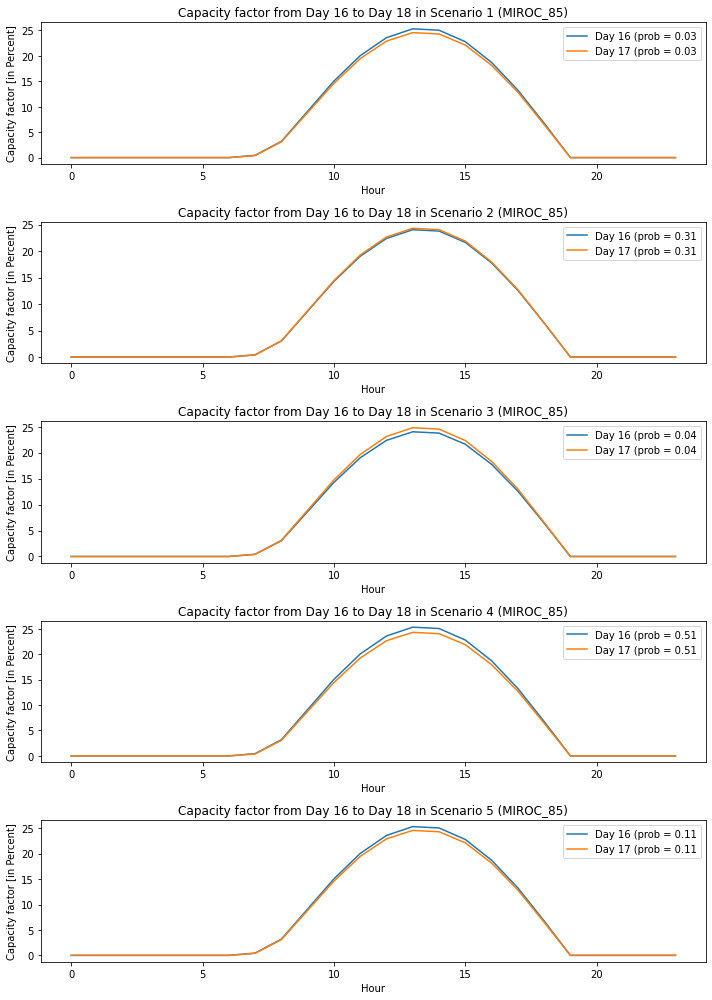

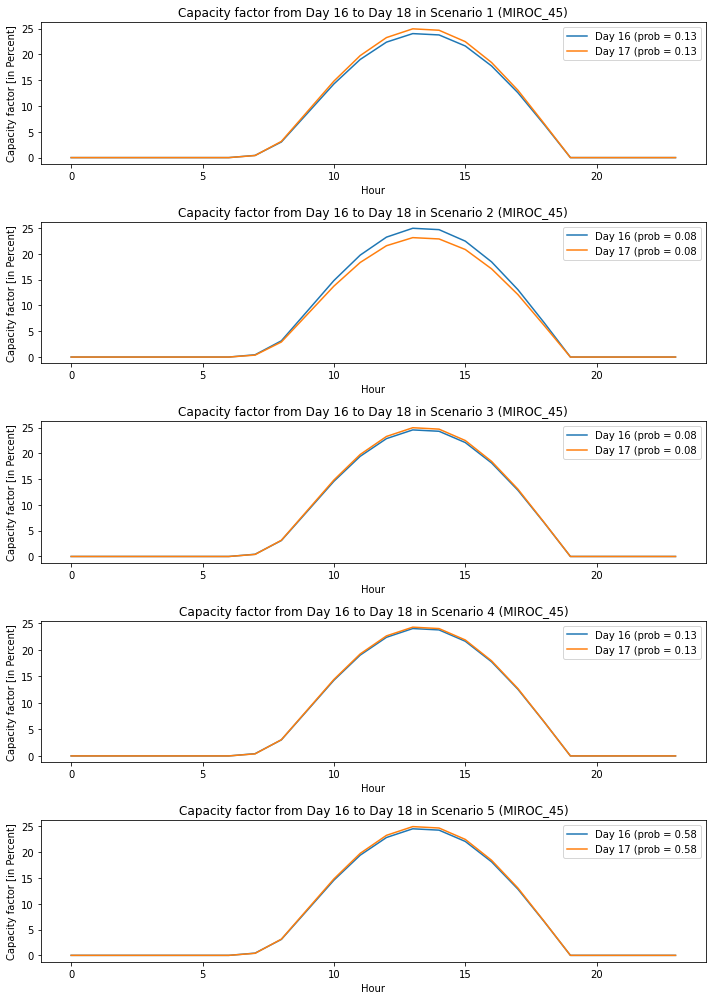

In [13]:
plot_pv_scenarios(hourly_pv_generation_CNRM_85,CNRM_85_daily_irrad_prob_norm , start_day , end_day , 5, name='CNRM_85')
plot_pv_scenarios(hourly_pv_generation_CNRM_45, CNRM_45_daily_irrad_prob_norm, start_day , end_day , 5, name='CNRM_45')

plot_pv_scenarios(hourly_pv_generation_MIROC_85, MIROC_85_daily_irrad_prob_norm, start_day , end_day , 5, name='MIROC_85')
plot_pv_scenarios(hourly_pv_generation_MIROC_45, MIROC_45_daily_irrad_prob_norm, start_day , end_day , 5, name='MIROC_45')

## Formatting Outputs

In [14]:
CNRM_85_hourly_scenario_format = format_pv_scenarios(hourly_pv_generation_CNRM_85, N, start_day, end_day)
CNRM_45_hourly_scenario_format = format_pv_scenarios(hourly_pv_generation_CNRM_45, N, start_day, end_day)

MIROC_85_hourly_scenario_format = format_pv_scenarios(hourly_pv_generation_MIROC_85, N, start_day, end_day)
MIROC_45_hourly_scenario_format = format_pv_scenarios(hourly_pv_generation_MIROC_45, N, start_day, end_day)

# Demand Scenarios

## Importing datasets

## Initialization

In [15]:
start=16 #The first day (Included)
end=18 #The last day (Excluded)
month=9 #September
N=5 #Number of Scenarios

In [16]:
url1 = 'https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/CED%202019%20Hourly%20Results%20-%20SDGE%20-%20HIGH-LOW.csv'

SDGE_High_Low = pd.read_csv(url1)
SDGE_High_Low=pd.DataFrame(SDGE_High_Low)
cols=['YEAR','MONTH','DAY','HOUR','MANAGED_NET_LOAD']
SDGE_High_Low=SDGE_High_Low.iloc[:][cols]
SDGE_High_Low.rename(columns={"MANAGED_NET_LOAD": "NET_LOAD"},inplace = True)

In [17]:
url2 = 'https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/CED%202019%20Hourly%20Results%20-%20SDGE%20-%20LOW-HIGH.csv'

SDGE_Low_High = pd.read_csv(url2)
SDGE_Low_High=pd.DataFrame(SDGE_Low_High)
cols=['YEAR','MONTH','DAY','HOUR','MANAGED_NET_LOAD']
SDGE_Low_High=SDGE_Low_High.iloc[:][cols]
SDGE_Low_High.rename(columns={"MANAGED_NET_LOAD": "NET_LOAD"},inplace = True)

In [18]:
url3 = 'https://raw.githubusercontent.com/rouzbehshi/ScenGen/main/Data/CED%202019%20Hourly%20Results%20-%20SDGE%20-%20MID-MID.csv'

SDGE_Mid_Mid = pd.read_csv(url3)
SDGE_Mid_Mid=pd.DataFrame(SDGE_Mid_Mid)
cols=['YEAR','MONTH','DAY','HOUR','MANAGED_NET_LOAD']
SDGE_Mid_Mid=SDGE_Mid_Mid.iloc[:][cols]
SDGE_Mid_Mid.rename(columns={"MANAGED_NET_LOAD": "NET_LOAD"},inplace = True)

## Generating Demand Scenarios

In [19]:
SDGE_High_Low_values, SDGE_High_Low_prob_norm = generate_demand_scenarios(month, N, SDGE_High_Low, start, end)
SDGE_Mid_Mid_values, SDGE_Mid_Mid_prob_norm = generate_demand_scenarios(month, N, SDGE_Mid_Mid, start, end)
SDGE_Low_High_values, SDGE_Low_High_prob_norm = generate_demand_scenarios(month,N,SDGE_Low_High, start, end)

## Plotting the Results

### Plot Demand Scenarios

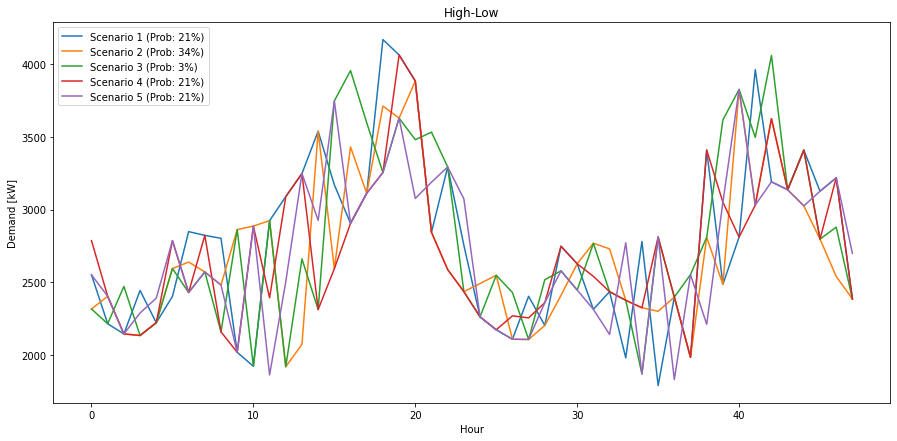

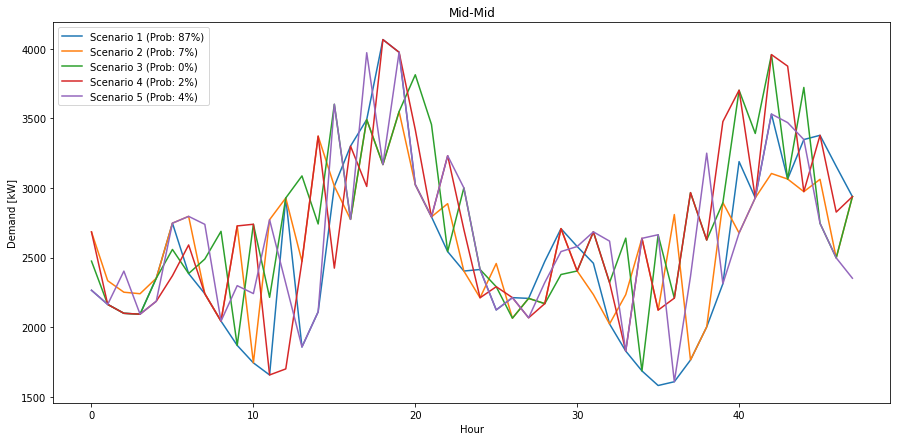

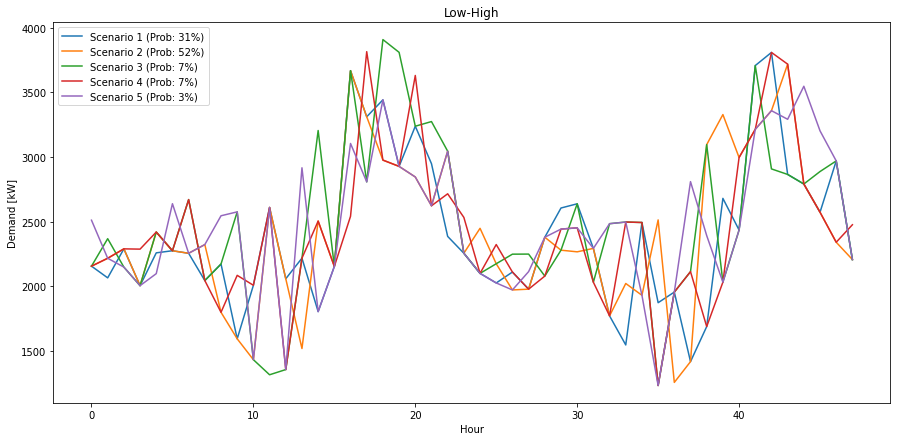

In [20]:
plot_demand_scenarios(SDGE_High_Low_values, SDGE_High_Low_prob_norm, name='High-Low')
plot_demand_scenarios(SDGE_Mid_Mid_values,SDGE_Mid_Mid_prob_norm,name='Mid-Mid')
plot_demand_scenarios(SDGE_Low_High_values,SDGE_Low_High_prob_norm,name='Low-High')

## Formatting Outputs

In [21]:
SDGE_High_Low_scenario_format = format_demand_scenarios(SDGE_High_Low_values)
SDGE_Mid_Mid_scenario_format = format_demand_scenarios(SDGE_Mid_Mid_values)
SDGE_Low_High_scenario_format = format_demand_scenarios(SDGE_Low_High_values)

# Scenario Tree

In [22]:
N_Branch= (1/4)*(1/3) # 4 climate and 3 demand models

In [23]:
c1 = CNRM_45_hourly_scenario_format
c2 = CNRM_85_hourly_scenario_format
c3 = MIROC_45_hourly_scenario_format
c4 = MIROC_85_hourly_scenario_format

d1 = SDGE_High_Low_scenario_format
d2 = SDGE_Mid_Mid_scenario_format
d3 = SDGE_Low_High_scenario_format

In [24]:
Pc1 = CNRM_45_daily_irrad_prob_norm
Pc2 = CNRM_85_daily_irrad_prob_norm
Pc3 = MIROC_45_daily_irrad_prob_norm
Pc4 = MIROC_85_daily_irrad_prob_norm

Pd1 = SDGE_High_Low_prob_norm
Pd2 = SDGE_Mid_Mid_prob_norm
Pd3 = SDGE_Low_High_prob_norm

### Supply and Demand values of each branch

In [25]:
c1d1_S, c1d1_D = combine_scenario_branch(c1, d1)
c1d2_S, c1d2_D = combine_scenario_branch(c1, d2)
c1d3_S, c1d3_D = combine_scenario_branch(c1, d3)

c2d1_S, c2d1_D = combine_scenario_branch(c2, d1)
c2d2_S, c2d2_D = combine_scenario_branch(c2, d2)
c2d3_S, c2d3_D = combine_scenario_branch(c2, d3)

c3d1_S, c3d1_D = combine_scenario_branch(c3, d1)
c3d2_S, c3d2_D = combine_scenario_branch(c3, d2)
c3d3_S, c3d3_D = combine_scenario_branch(c3, d3)

c4d1_S, c4d1_D = combine_scenario_branch(c4, d1)
c4d2_S, c4d2_D = combine_scenario_branch(c4, d2)
c4d3_S, c4d3_D = combine_scenario_branch(c4, d3)

### Supply and Demand probability of each branch

In [26]:
Pc1d1 = combine_probability_branch(Pc1, Pd1, N_Branch)
Pc1d2 = combine_probability_branch(Pc1, Pd2, N_Branch)
Pc1d3 = combine_probability_branch(Pc1, Pd3, N_Branch)

Pc2d1 = combine_probability_branch(Pc2, Pd1, N_Branch)
Pc2d2 = combine_probability_branch(Pc2, Pd2, N_Branch)
Pc2d3 = combine_probability_branch(Pc2, Pd3, N_Branch)

Pc3d1 = combine_probability_branch(Pc3, Pd1, N_Branch)
Pc3d2 = combine_probability_branch(Pc3, Pd2, N_Branch)
Pc3d3 = combine_probability_branch(Pc3, Pd3, N_Branch)

Pc4d1 = combine_probability_branch(Pc4, Pd1, N_Branch)
Pc4d2 = combine_probability_branch(Pc4, Pd2, N_Branch)
Pc4d3 = combine_probability_branch(Pc4, Pd3, N_Branch)

## Combining all the scenarios

In [27]:
Supply = combine_scenario_tree([c1d1_S,c1d2_S,c1d3_S,c2d1_S,c2d2_S,c2d3_S,c3d1_S,c3d2_S,c3d3_S,c4d1_S,c4d2_S,c4d3_S])
Demand = combine_scenario_tree([c1d1_D,c1d2_D,c1d3_D,c2d1_D,c2d2_D,c2d3_D,c3d1_D,c3d2_D,c3d3_D,c4d1_D,c4d2_D,c4d3_D])

## Formatting Outputs

In [28]:
Supply = reformat_scenarios(Supply)
Demand = reformat_scenarios(Demand)
probability = combine_probability_tree([Pc1d1,Pc1d2,Pc1d3,Pc2d1,Pc2d2,Pc2d3,Pc3d1,Pc3d2,Pc3d3,Pc4d1,Pc4d2,Pc4d3])